In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml

/home/zander/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Acceleration

In [18]:
def create_map_acceleration(length_straight, stop_area_length, track_width):
    orange_cones = []
    blue_cones = []
    yellow_cones = []
    centerline = []

    # Starting lines
    orange_cones.append([0, track_width/2])
    orange_cones.append([0, -track_width/2])
    # Not sure about the 0.6m, not really clear from rules
    orange_cones.append([0.6, track_width/2])
    orange_cones.append([0.6, -track_width/2])

    centerline.append([0, 0])

    # Acceleration line
    for i in range(1, length_straight//5):
        blue_cones.append([i*5 + 0.6, track_width/2])
        yellow_cones.append([i*5 + 0.6, -track_width/2])
        centerline.append([i*5 + 0.6, 0])

    # End timing line
    orange_cones.append([length_straight + 0.3, track_width/2])
    orange_cones.append([length_straight + 0.3, -track_width/2])
    orange_cones.append([length_straight + 0.6, track_width/2])
    orange_cones.append([length_straight + 0.6, -track_width/2])

    # End box of 75m
    for i in range(1, stop_area_length//5 + 1):
        orange_cones.append([length_straight + 0.6 + i*5, track_width/2])
        orange_cones.append([length_straight + 0.6 + i*5, -track_width/2])
        centerline.append([length_straight + 0.6 + i*5, 0])
    
    # Close box
    for i in range(1, track_width):
        orange_cones.append([length_straight + 0.6 + stop_area_length, track_width/2 - i])


    return np.array(blue_cones), np.array(yellow_cones), np.array(orange_cones), np.array(centerline)


(-7.53, 158.13, -1.65, 1.65)

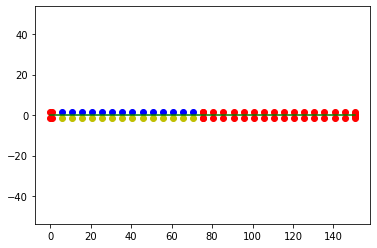

In [19]:
length_straight = 75
stop_area_length = 75
track_width = 3

blue_cones, yellow_cones, orange_cones, centerline = create_map_acceleration(length_straight, stop_area_length, track_width)

plt.plot(blue_cones[:,0], blue_cones[:,1], 'bo')
plt.plot(yellow_cones[:,0], yellow_cones[:,1], 'yo')
plt.plot(orange_cones[:,0], orange_cones[:,1], 'ro')
plt.plot(centerline[:,0], centerline[:,1], 'g')
plt.axis('equal')

# Skidpad

In [20]:
def create_map_skidpad(diameter_inner, diameter_outer):
    orange_cones = []
    blue_cones = []
    yellow_cones = []
    centerline = []

    # track width fixed
    track_width = 3

    # Starting orange cones
    orange_cones.append([0, track_width/2])
    orange_cones.append([0, -track_width/2])
    orange_cones.append([5, track_width/2])
    orange_cones.append([5, -track_width/2])

    # Right circle
    
    angle_inner_right = np.linspace(-np.pi/2, 3*np.pi/2, 17)
    # 16 inner cones
    for i in range(16):
        yellow_cones.append([15 + diameter_inner/2*np.cos(angle_inner_right[i]), -track_width/2 - diameter_inner/2 - diameter_inner/2*np.sin(angle_inner_right[i])])
    print(yellow_cones)
    
    angle_outer_right = np.linspace(-np.pi/2, 3*np.pi/2, 17)
    # Only 13 outer cones
    for i in range(2, 15):
        blue_cones.append([15 + diameter_outer/2*np.cos(angle_outer_right[i]), -track_width/2 - diameter_inner/2 - diameter_outer/2*np.sin(angle_outer_right[i])])

    # Left circle
    angle_inner_left = np.linspace(-np.pi/2, 3*np.pi/2, 17)
    # 16 inner cones
    for i in range(16):
        blue_cones.append([15 + diameter_inner/2*np.cos(angle_inner_left[i]), track_width/2 + diameter_inner/2 + diameter_inner/2*np.sin(angle_inner_left[i])])
    
    angle_outer_left = np.linspace(-np.pi/2, 3*np.pi/2, 17)
    # Only 13 outer cones
    for i in range(2, 15):
        yellow_cones.append([15 + diameter_outer/2*np.cos(angle_outer_left[i]), track_width/2 + diameter_inner/2 + diameter_outer/2*np.sin(angle_outer_left[i])])

    # Cones for timing equipment
    orange_cones.append([15-0.3, track_width/2])
    orange_cones.append([15-0.3, -track_width/2])
    orange_cones.append([15+0.3, track_width/2])
    orange_cones.append([15+0.3, -track_width/2])

    # Stop area
    for i in range(0, track_width+1):
        orange_cones.append([40, track_width/2 - i])

    orange_cones.append([35, -track_width/2])
    orange_cones.append([35, track_width/2])
    orange_cones.append([30, -track_width/2])
    orange_cones.append([30, track_width/2])
    orange_cones.append([25, -track_width/2])
    orange_cones.append([25, track_width/2])

    # centerline
    diameter = (diameter_outer + diameter_inner) / 2
    # start
    for i in range(0, 16, 3):
        centerline.append([i, 0])

    # right circle
    angle = np.linspace(5*np.pi/2, np.pi/2, 20)
    for i in range(20):
        centerline.append([15 + diameter/2*np.cos(angle[i]), - diameter/2 + diameter/2*np.sin(angle[i])])
    for i in range(20):
        centerline.append([15 + diameter/2*np.cos(angle[i]), - diameter/2 + diameter/2*np.sin(angle[i])])

    # left circle
    angle = np.linspace(-np.pi/2, 3*np.pi/2, 20)
    for i in range(20):
        centerline.append([15 + diameter/2*np.cos(angle[i]), diameter/2 + diameter/2*np.sin(angle[i])])
    for i in range(20):
        centerline.append([15 + diameter/2*np.cos(angle[i]), diameter/2 + diameter/2*np.sin(angle[i])])

    # stop
    for i in range(15, 42, 3):
        centerline.append([i, 0])

    return np.array(blue_cones), np.array(yellow_cones), np.array(orange_cones), np.array(centerline)

[[15.0, -1.5], [17.91796117178381, -2.0804185646014384], [20.391689206547426, -3.733310793452576], [22.044581435398563, -6.207038828216191], [22.625, -9.125], [22.044581435398563, -12.042961171783809], [20.391689206547426, -14.516689206547424], [17.91796117178381, -16.169581435398563], [15.0, -16.75], [12.082038828216191, -16.169581435398563], [9.608310793452576, -14.516689206547426], [7.95541856460144, -12.042961171783814], [7.375, -9.125000000000002], [7.955418564601439, -6.207038828216188], [9.608310793452574, -3.733310793452576], [12.082038828216186, -2.08041856460144]]


(-2.0, 42.0, -21.725, 21.725)

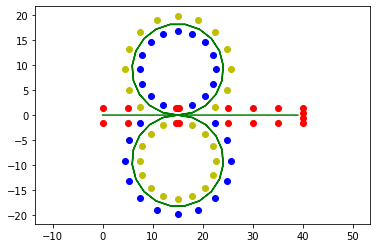

In [21]:
diameter_inner = 15.25
diameter_outer = 21.25

blue_cones, yellow_cones, orange_cones, centerline = create_map_skidpad(diameter_inner, diameter_outer)

plt.plot(blue_cones[:,0], blue_cones[:,1], 'bo')
plt.plot(yellow_cones[:,0], yellow_cones[:,1], 'yo')
plt.plot(orange_cones[:,0], orange_cones[:,1], 'ro')
plt.plot(centerline[:,0], centerline[:,1], 'g')
plt.axis('equal')

# DVSV

In [22]:
def create_map_dvsv(distance_cones_straight, cones_on_straight, track_width, turn_radius, blue_cones_turn, yellow_cones_turn, centerline_points_turn):
    blue_cones = np.array([[0, track_width/2]])
    yellow_cones = np.array([[0, -track_width/2]])

    centerline = np.array([[0, 0]])

    straight_length = distance_cones_straight * cones_on_straight

    # straight; cones_on_straight amount of cones with spacing of distance_cones_straight
    for i in range(1, cones_on_straight + 1):
        blue_cones = np.append(blue_cones, [[i*distance_cones_straight, track_width/2]], axis=0)
        yellow_cones = np.append(yellow_cones, [[i*distance_cones_straight, -track_width/2]], axis=0)
        centerline = np.append(centerline, [[i*distance_cones_straight, 0]], axis=0)
    
    # left turn of 180 degrees with radius turn_radius
    inner_radius = turn_radius - track_width/2
    angle = np.linspace(-np.pi/2, np.pi/2, blue_cones_turn)
    x = inner_radius*np.cos(angle) + straight_length + distance_cones_straight
    y = inner_radius*np.sin(angle) + turn_radius
    blue_cones = np.append(blue_cones, np.column_stack((x, y)), axis=0)

    angle = np.linspace(-np.pi/2, np.pi/2, yellow_cones_turn)
    outer_radius = turn_radius + track_width/2
    x = outer_radius*np.cos(angle) + straight_length + distance_cones_straight
    y = outer_radius*np.sin(angle) + turn_radius
    yellow_cones = np.append(yellow_cones, np.column_stack((x, y)), axis=0)

    angle = np.linspace(-np.pi/2, np.pi/2, centerline_points_turn)
    x = turn_radius*np.cos(angle) + straight_length + distance_cones_straight
    y = turn_radius*np.sin(angle) + turn_radius
    centerline = np.append(centerline, np.column_stack((x, y)), axis=0)

    # reverse straight; cones_on_straight amount of cones with spacing of distance_cones_straight
    for i in range(0, cones_on_straight + 1):
        blue_cones = np.append(blue_cones, [[straight_length - i*distance_cones_straight, -track_width/2 + turn_radius*2, ]], axis=0)
        yellow_cones = np.append(yellow_cones, [[straight_length - i*distance_cones_straight, +track_width/2 + turn_radius*2]], axis=0)
        centerline = np.append(centerline, [[straight_length - i*distance_cones_straight, +turn_radius*2]], axis=0)


    return blue_cones, yellow_cones, centerline

(-1.9700625197289676, 41.37131291430832, -2.15, 12.15)

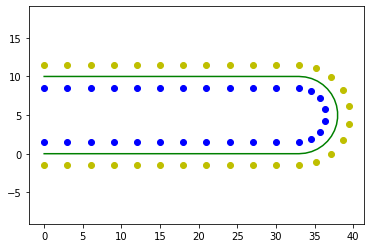

In [24]:
distance_cones_straight = 3
cones_on_straight = 10 # so 30m

track_width = 3

turn_radius = 5
blue_cones_turn = 8
yellow_cones_turn = 10
centerline_points_turn = 20

blue_cones, yellow_cones, centerline = create_map_dvsv(distance_cones_straight, cones_on_straight, track_width, turn_radius, blue_cones_turn, yellow_cones_turn, centerline_points_turn)

plt.plot(blue_cones[:,0], blue_cones[:,1], 'bo')
plt.plot(yellow_cones[:,0], yellow_cones[:,1], 'yo')
plt.plot(centerline[:,0], centerline[:,1], 'g')
plt.axis('equal')
# plt.ylim(25, 50)

# Save configurations to files
Don't forget to change filename

In [38]:
# Save in ROS format to YAML file
all_cones = []

# Iterate over blue cone locations and create YAML entries
for cone in blue_cones:
    cone_entry = {
        "covariance": [0.0] * 9,
        "observation": {
            "belief": 1,
            "location": {"x": float(cone[0]), "y": float(cone[1]), "z": 0},
            "observation_class": 0,
        },
    }
    all_cones.append(cone_entry)

# Iterate over yellow cone locations and create YAML entries
for cone in yellow_cones:
    cone_entry = {
        "covariance": [0.0] * 9,
        "observation": {
            "belief": 1,
            "location": {"x": float(cone[0]), "y": float(cone[1]), "z": 0},
            "observation_class": 1,
        },
    }
    all_cones.append(cone_entry)

# Create the final YAML data structure
data = {
    "header": {
        "frame_id": "ugr/map",
        "seq": 0,
        "stamp": {"nsecs": 0, "secs": 0},
    },
    "observations": all_cones,
}


filename = "map_dvsv.yaml"

with open(filename, "w") as file:
    yaml.dump(data, file)

In [39]:
all_poses = []

# Iterate over path poses and create YAML entries
for pose in centerline:
    pose_entry = {
        "header": {
            "frame_id": "ugr/map",
            "seq": 0,
            "stamp": {"nsecs": 0, "secs": 0},
        },
        "pose": {
            "position": {"x": float(pose[0]), "y": float(pose[1]), "z": 0},
            "orientation": {"x": 0, "y": 0, "z": 0, "w": 1},
        },
    }
    all_poses.append(pose_entry)

# Create the final YAML data structure
data = {
    "header": {
        "frame_id": "ugr/map",
        "seq": 0,
        "stamp": {"nsecs": 0, "secs": 0},
    },
    "poses": all_poses,
}

filename = "centerline_dvsv.yaml"

with open(filename, "w") as file:
    yaml.dump(data, file)